<h2><a href="https://leetcode.com/problems/range-sum-query-mutable/">307. Range Sum Query - Mutable</a></h2><h3>Medium</h3><hr><p>Given an integer array <code>nums</code>, handle multiple queries of the following types:</p>

<ol>
	<li><strong>Update</strong> the value of an element in <code>nums</code>.</li>
	<li>Calculate the <strong>sum</strong> of the elements of <code>nums</code> between indices <code>left</code> and <code>right</code> <strong>inclusive</strong> where <code>left &lt;= right</code>.</li>
</ol>

<p>Implement the <code>NumArray</code> class:</p>

<ul>
	<li><code>NumArray(int[] nums)</code> Initializes the object with the integer array <code>nums</code>.</li>
	<li><code>void update(int index, int val)</code> <strong>Updates</strong> the value of <code>nums[index]</code> to be <code>val</code>.</li>
	<li><code>int sumRange(int left, int right)</code> Returns the <strong>sum</strong> of the elements of <code>nums</code> between indices <code>left</code> and <code>right</code> <strong>inclusive</strong> (i.e. <code>nums[left] + nums[left + 1] + ... + nums[right]</code>).</li>
</ul>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<pre>
<strong>Input</strong>
[&quot;NumArray&quot;, &quot;sumRange&quot;, &quot;update&quot;, &quot;sumRange&quot;]
[[[1, 3, 5]], [0, 2], [1, 2], [0, 2]]
<strong>Output</strong>
[null, 9, null, 8]

<strong>Explanation</strong>
NumArray numArray = new NumArray([1, 3, 5]);
numArray.sumRange(0, 2); // return 1 + 3 + 5 = 9
numArray.update(1, 2);   // nums = [1, 2, 5]
numArray.sumRange(0, 2); // return 1 + 2 + 5 = 8
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>1 &lt;= nums.length &lt;= 3 * 10<sup>4</sup></code></li>
	<li><code>-100 &lt;= nums[i] &lt;= 100</code></li>
	<li><code>0 &lt;= index &lt; nums.length</code></li>
	<li><code>-100 &lt;= val &lt;= 100</code></li>
	<li><code>0 &lt;= left &lt;= right &lt; nums.length</code></li>
	<li>At most <code>3 * 10<sup>4</sup></code> calls will be made to <code>update</code> and <code>sumRange</code>.</li>
</ul>


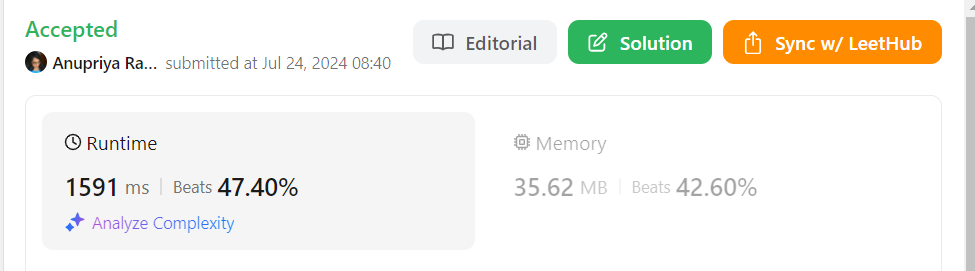

In [ ]:
class NumArray:

    def __init__(self, nums: List[int]):
        self.n = len(nums)
        self.tree = [0] * (4 * self.n)      # tree size will 4 times array
        self.buildTree(nums, 0, 0, self.n - 1) 

    def buildTree(self, nums, tree_index, low, high):
        if low == high:                        # if low is same as high , then tree_index will have nums[low]
            self.tree[tree_index] = nums[low]
            return

        mid = (low + high) // 2                 # else find mid and call recursive function with left index and right index 
        self.buildTree(nums, 2 * tree_index + 1, low, mid)
        self.buildTree(nums, 2 * tree_index + 2, mid + 1, high)
        self.tree[tree_index] = (
            self.tree[2 * tree_index + 1] + self.tree[2 * tree_index + 2]      # at the end update, tree_index with the sum of elements from its left and right index
        )

    def updateTree(self, tree_index, low, high, idx, val):
        if low == high:                               # Base case:if low equals high, then val is updated in tree index
            self.tree[tree_index] = val
            return

        mid = (low + high) // 2                   # find mid and if given idx is less thn mid, recurisvely call left index
        if idx <= mid:
            self.updateTree(2 * tree_index + 1, low, mid, idx, val)
        else:
            self.updateTree(2 * tree_index + 2, mid + 1, high, idx, val)   # else right index 
        self.tree[tree_index] = (
            self.tree[2 * tree_index + 1] + self.tree[2 * tree_index + 2]     # At last, value of tree index will be sum if left and right index 
        )

    def queryTree(self, tree_index, low, high, i, j):
        if low > j or high < i:      # if low, high is outside i, j interval, then return 0
            return 0

        if i <= low and j >= high:          # if low, high completely inside i, j, then return value at tree_index
            return self.tree[tree_index]

        mid = (low + high) // 2
        if i > mid:                   # if 
            return self.queryTree(2 * tree_index + 2, mid + 1, high, i, j)
        elif j <= mid:
            return self.queryTree(2 * tree_index + 1, low, mid, i, j)
        else:
            return self.queryTree(
                2 * tree_index + 1, low, mid, i, mid
            ) + self.queryTree(2 * tree_index + 2, mid + 1, high, mid + 1, j)

    def update(self, index: int, val: int) -> None:
        self.updateTree(0, 0, self.n - 1, index, val)

    def sumRange(self, left: int, right: int) -> int:
        return self.queryTree(0, 0, self.n - 1, left, right)


# Your NumArray object will be instantiated and called as such:
# obj = NumArray(nums)
# obj.update(index,val)
# param_2 = obj.sumRange(left,right)

In [1]:
a = [1,2,3]

In [2]:
map(a, str)

TypeError: 'type' object is not iterable

In [3]:
list(map(str, a))

['1', '2', '3']